In [9]:
# Importaciones necesarias
from IPython.display import Image     # Import the Image function from IPython.display to display images in Jupyter environments.
from os import chdir                  # Import chdir from os module to change the current working directory.
from scipy.spatial import Delaunay    # Import Delaunay
import numpy as np                    # Import numpy library for working with n-dimensional arrays and mathematical operations.
import gudhi as gd                    # Import gudhi library for computational topology and computational geometry.
import matplotlib.pyplot as plt       # Import pyplot from matplotlib for creating visualizations and graphs.
import argparse                       # Import argparse, a standard library for writing user-friendly command-line interfaces.
import seaborn as sns                 # Import seaborn for data visualization; it's based on matplotlib and provides a high-level interface for drawing statistical graphs.
import requests                       # Import requests library to make HTTP requests in Python easily.
import pandas as pd                   # Import pandas for data manipulation and analysis.
from scipy.spatial.distance import pdist, squareform  # Import distance functions from scipy.spatial.distance
import os
from os import path, makedirs

       id Tipo    X    Y  Z
0       4    B  129   83  0
1       4    B  130   83  0
2       4    B  131   83  0
3       4    B  132   83  0
4       7    A  142   83  0
...   ...  ...  ...  ... ..
7328  161    A  130  182  0
7329  161    A  131  182  0
7330  162    A  137  182  0
7331  162    A  138  182  0
7332  162    A  139  182  0

[7333 rows x 5 columns]


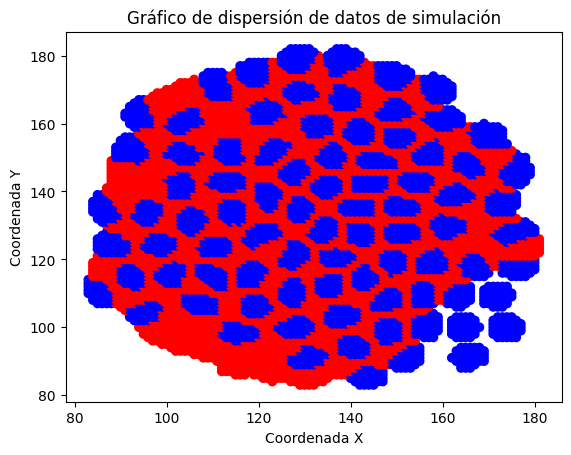

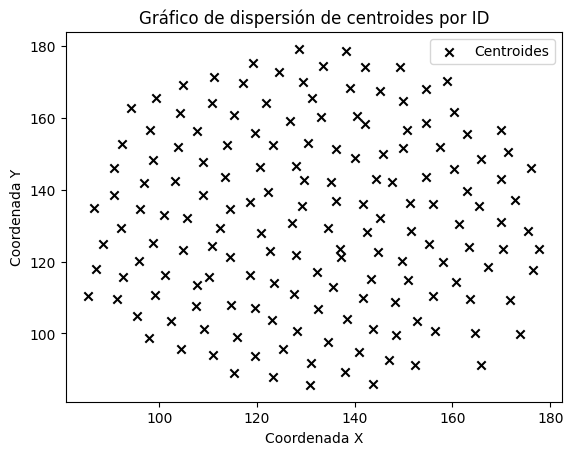

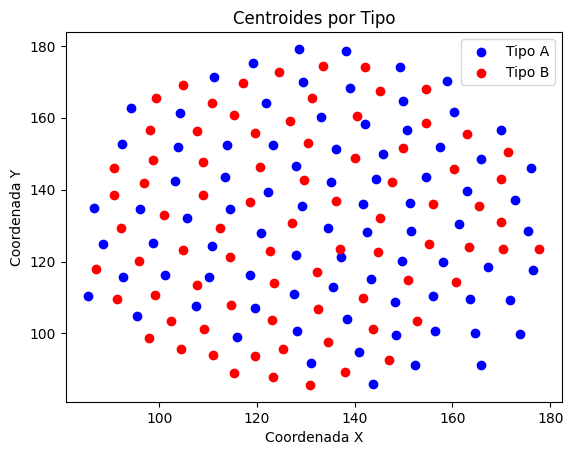

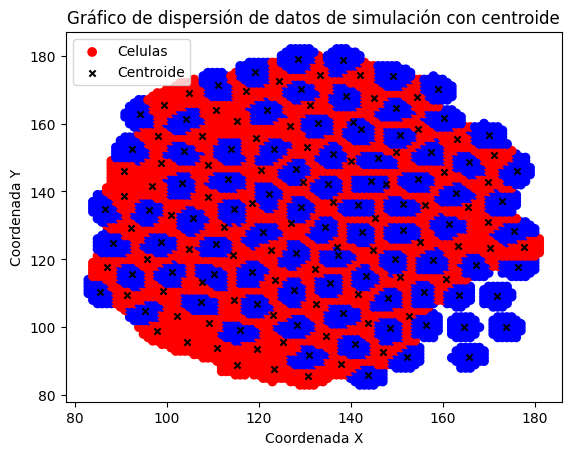

     centroides_x  centroides_y tipo
0      110.936170     93.936170    B
1      115.400000     88.955556    B
2      123.346939     87.836735    B
3      130.755556     85.688889    B
4      137.916667     89.166667    B
..            ...           ...  ...
159    124.437500    172.687500    B
160    128.555556    179.133333    A
161    138.282609    178.673913    A
162    142.142857    174.214286    B
163    145.127660    167.489362    B

[164 rows x 3 columns]
[ 6.68822089 13.82860405 21.46685083 ...  5.89828738 13.11292913
  7.35755724]
Máximo: 101.43943723866515, Mínimo: 2.341538050170902, Promedio: 44.199675315382606


In [69]:
# Cargar datos desde un archivo CSV
url = "/home/jupyter-alumno15/celulas/csv/archivo_1.csv"
df = pd.read_csv(url, header=None)
df.head(5)

# Asignar nombres a las columnas
nombres_columnas = ['id', "Tipo", 'X', 'Y', "Z"]  # Reemplaza con los nombres que correspondan
df.columns = nombres_columnas

# Mostrar el DataFrame
print(df)

# Extraer las coordenadas X e Y y el tipo
X = df['X']
Y = df['Y']
tipo = df['Tipo']
id1 = df['id']

# Crear un mapa de colores basado en los tipos
colores = {'A': 'b', 'B': 'r'}  # Ajusta los colores a cada tipo
colores_puntos = [colores[t] for t in tipo]

# Crear y guardar el gráfico de dispersión inicial
plt.scatter(X, Y, c=colores_puntos)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Gráfico de dispersión de datos de simulación')
if not path.exists('Datos_im'):
    makedirs('Datos_im')
plt.savefig(f'Datos_im/grafico_dispersion_{path.basename(url)}.png')
plt.show()
plt.close()

# Agrupar los datos por el ID
grupos = df.groupby('id')

# Inicializar listas para almacenar los centroides
centroides_x = []
centroides_y = []

# Calcular el centroide para cada grupo
for id_grupo, grupo in grupos:
    X_grupo = grupo['X']
    Y_grupo = grupo['Y']
    centroid_x_grupo = X_grupo.mean()
    centroid_y_grupo = Y_grupo.mean()
    centroides_x.append(centroid_x_grupo)
    centroides_y.append(centroid_y_grupo)

# Crear y guardar el gráfico de dispersión solo con los centroides
plt.scatter(centroides_x, centroides_y, color='black', marker='x', label='Centroides')  # Agregar los centroides al gráfico
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Gráfico de dispersión de centroides por ID')
plt.legend()  # Mostrar la leyenda con la etiqueta de los centroides
plt.savefig(f'Datos_im/grafico_centroides_{path.basename(url)}.png')
plt.show()
plt.close()

# Agrupar los datos por el ID y el Tipo
grupos_tipo = df.groupby(['id', 'Tipo'])

# Inicializar listas para almacenar los centroides y tipos
centroides_x = []
centroides_y = []
tipos_centroides = []

# Calcular el centroide y el tipo para cada grupo
for (id_grupo, tipo_grupo), grupo in grupos_tipo:
    X_grupo = grupo['X']
    Y_grupo = grupo['Y']
    centroid_x_grupo = X_grupo.mean()
    centroid_y_grupo = Y_grupo.mean()
    centroides_x.append(centroid_x_grupo)
    centroides_y.append(centroid_y_grupo)
    tipos_centroides.append(tipo_grupo)  # Guardar el tipo del grupo

# Crear y guardar el gráfico de dispersión con centroides por tipo
for tipo in set(tipos_centroides):
    color = 'b' if tipo == 'A' else 'r'  # Rojo para tipo 'A', azul para tipo 'B'
    indices_tipo = [i for i, t in enumerate(tipos_centroides) if t == tipo]
    centroides_x_tipo = [centroides_x[i] for i in indices_tipo]
    centroides_y_tipo = [centroides_y[i] for i in indices_tipo]
    plt.scatter(centroides_x_tipo, centroides_y_tipo, color=color, label=f'Tipo {tipo}')

plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Centroides por Tipo')
plt.legend()
plt.savefig(f'Datos_im/grafico_centroides_tipo_{path.basename(url)}.png')
plt.show()
plt.close()

# Crear y guardar el gráfico de dispersión combinado
plt.scatter(X, Y, c=colores_puntos, label='Celulas')
plt.scatter(centroides_x, centroides_y, color='black', marker='x', s=20, label='Centroide')  # Agregar el centroide al gráfico
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Gráfico de dispersión de datos de simulación con centroide')
plt.legend() 
plt.savefig(f'Datos_im/grafico_dispersion_centroides_{path.basename(url)}.png')
plt.show()
plt.close()

# Crear DataFrame con los centroides y tipos
df_centroides = pd.DataFrame({"centroides_x": centroides_x, "centroides_y": centroides_y, "tipo": tipos_centroides})
print(df_centroides)

# Guardar el DataFrame de centroides en un archivo CSV
output_dir = 'centroides'
if not path.exists(output_dir):
    makedirs(output_dir)
input_filename = path.basename(url)
output_filename = f"{output_dir}/centroides_{input_filename}"
df_centroides.to_csv(output_filename, index=False)

# Matriz de distancias
matrix_distance = pdist(df_centroides[['centroides_x', 'centroides_y']], metric='euclidean')
print(matrix_distance)

# Estadísticas de la matriz de distancias
maximo = matrix_distance.max()
minimo = matrix_distance.min()
promedio = matrix_distance.mean()
print(f"Máximo: {maximo}, Mínimo: {minimo}, Promedio: {promedio}")


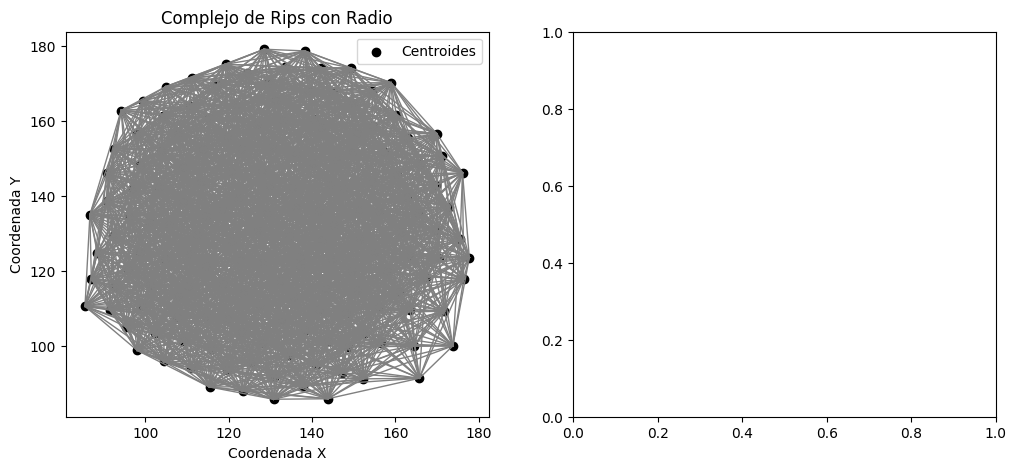

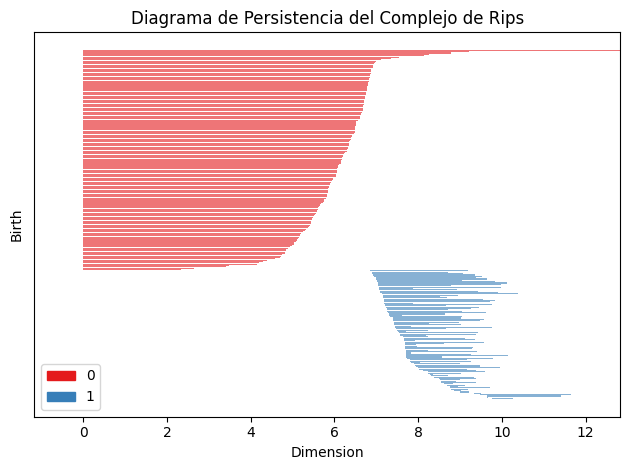

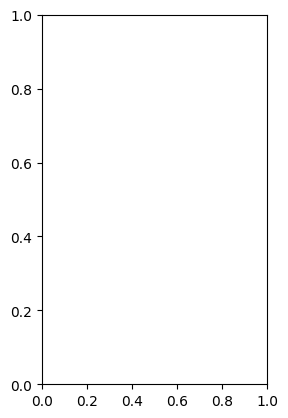

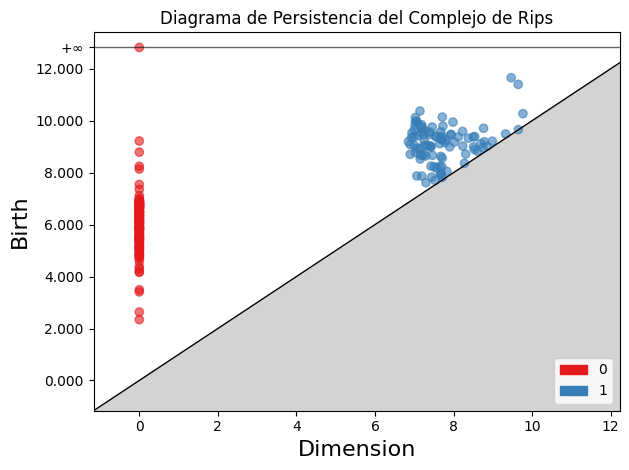

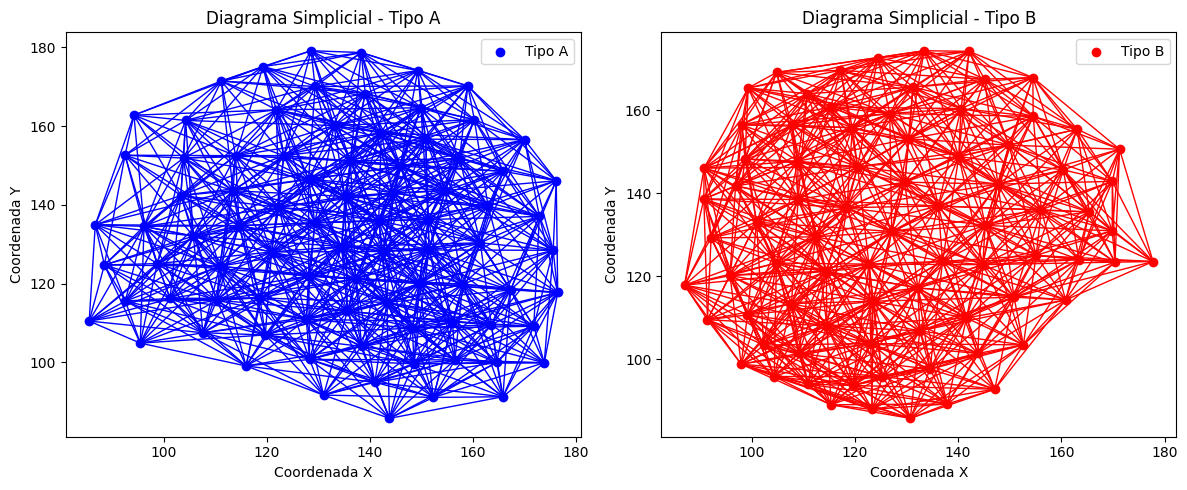

<Figure size 1200x500 with 0 Axes>

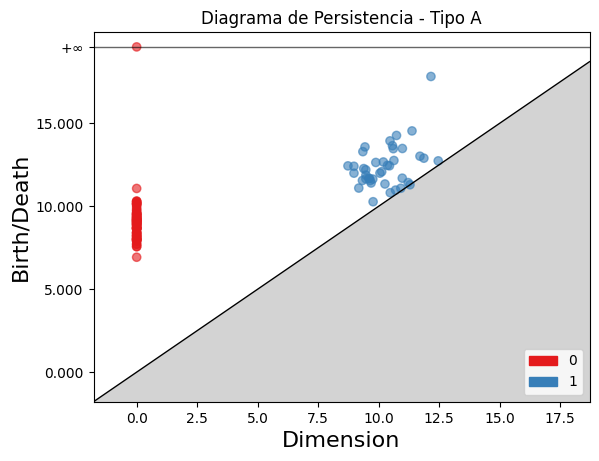

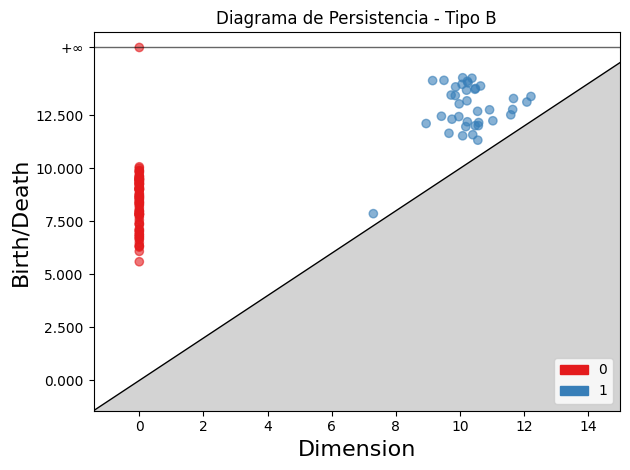

Diagrama de Persistencia - Tipo A (Dimensión 1): [[ 9.76694022 10.26946958]
 [10.47568156 10.81287006]
 [10.69496319 10.97126096]
 [10.91143018 11.0821219 ]
 [ 9.17587424 11.09299717]
 [11.29138421 11.29267755]
 [10.25678284 11.33863935]
 [ 9.68464647 11.39835294]
 [11.21442947 11.42223855]
 [ 9.64719524 11.54097377]
 [ 9.32606901 11.55002613]
 [ 9.75506946 11.63345835]
 [ 9.46761472 11.65369189]
 [ 9.59024878 11.67165065]
 [ 9.619721   11.67174834]
 [10.97237798 11.68971348]
 [ 9.46850205 11.87369859]
 [ 8.97710316 11.99129886]
 [10.04967965 11.99229845]
 [10.12302456 12.07963098]
 [ 9.46611419 12.19333923]
 [ 9.38107681 12.26618321]
 [ 8.97419104 12.40590624]
 [ 8.72881847 12.4299674 ]
 [10.44241116 12.43425228]
 [10.36129944 12.46301576]
 [ 9.87911119 12.63585805]
 [10.19108933 12.66432799]
 [12.45744528 12.73202174]
 [10.62715224 12.75467576]
 [11.86506317 12.89321714]
 [11.70323647 13.01301374]
 [ 9.34473051 13.28770134]
 [10.60220178 13.46663837]
 [10.97697834 13.47805027]
 [ 9.4

In [68]:
# Convertir las coordenadas de los centroides a un formato adecuado para Gudhi
puntos = np.array(list(zip(centroides_x, centroides_y)))

# Calcular el complejo de Rips con un radio específico
rips_complex = gd.RipsComplex(points=puntos, max_edge_length=30)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

# Visualizar el complejo de Rips
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(centroides_x, centroides_y, color='black', label='Centroides')
for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
    if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
        arista = simplex[0]
        x = [centroides_x[i] for i in arista]
        y = [centroides_y[i] for i in arista]
        plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Complejo de Rips con Radio')
plt.legend()


# Calcular el diagrama de persistencia
diag = simplex_tree.persistence()

# Mostrar el diagrama de persistencia
plt.subplot(1, 2, 2)
gd.plot_persistence_barcode(diag)
plt.title('Diagrama de Persistencia del Complejo de Rips')
plt.xlabel('Dimension')
plt.ylabel('Birth')
plt.tight_layout()
plt.show()

plt.subplot(1, 2, 2)
gd.plot_persistence_diagram(diag)
plt.title('Diagrama de Persistencia del Complejo de Rips')
plt.xlabel('Dimension')
plt.ylabel('Birth')
plt.tight_layout()
plt.show()

# Separar los centroides por tipo
centroides_tipo_A = [(x, y) for x, y, tipo in zip(centroides_x, centroides_y, tipos_centroides) if tipo == 'A']
centroides_tipo_B = [(x, y) for x, y, tipo in zip(centroides_x, centroides_y, tipos_centroides) if tipo == 'B']

# Convertir las coordenadas de los centroides a un formato adecuado para Gudhi
puntos_tipo_A = np.array(centroides_tipo_A)
puntos_tipo_B = np.array(centroides_tipo_B)

# Calcular el complejo de Rips con un radio específico para cada tipo
rips_complex_tipo_A = gd.RipsComplex(points=puntos_tipo_A, max_edge_length=30)
rips_complex_tipo_B = gd.RipsComplex(points=puntos_tipo_B, max_edge_length=30)

# Generar un diagrama simplicial para cada tipo
simplex_tree_A = rips_complex_tipo_A.create_simplex_tree(max_dimension=3)
simplex_tree_B = rips_complex_tipo_B.create_simplex_tree(max_dimension=3)

# Visualizar los diagramas simpliciales para cada tipo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for simplex in simplex_tree_A.get_skeleton(1):
    if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
        arista = simplex[0]
        x = [puntos_tipo_A[i][0] for i in arista]
        y = [puntos_tipo_A[i][1] for i in arista]
        plt.plot(x, y, color='blue', linestyle='-', linewidth=1)  # Color azul para tipo A
plt.scatter(puntos_tipo_A[:, 0], puntos_tipo_A[:, 1], color='blue', label='Tipo A')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Diagrama Simplicial - Tipo A')
plt.legend()

plt.subplot(1, 2, 2)
for simplex in simplex_tree_B.get_skeleton(1):
    if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
        arista = simplex[0]
        x = [puntos_tipo_B[i][0] for i in arista]
        y = [puntos_tipo_B[i][1] for i in arista]
        plt.plot(x, y, color='red', linestyle='-', linewidth=1)  # Color rojo para tipo B
plt.scatter(puntos_tipo_B[:, 0], puntos_tipo_B[:, 1], color='red', label='Tipo B')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Diagrama Simplicial - Tipo B')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))


gd.plot_persistence_diagram(simplex_tree_A.persistence(), legend=True)
plt.title('Diagrama de Persistencia - Tipo A')
plt.xlabel('Dimension')
plt.ylabel('Birth/Death')

gd.plot_persistence_diagram(simplex_tree_B.persistence(), legend=True)
plt.title('Diagrama de Persistencia - Tipo B')
plt.xlabel('Dimension')
plt.ylabel('Birth/Death')

plt.tight_layout()
plt.show()

# Calcular los diagramas de persistencia para cada tipo
simplex_tree_A.compute_persistence()
simplex_tree_B.compute_persistence()

diag_persistencia_tipo_A = simplex_tree_A.persistence_intervals_in_dimension(1)
diag_persistencia_tipo_B = simplex_tree_B.persistence_intervals_in_dimension(1)
diag_persistencia_tipo_A_0 = simplex_tree_A.persistence_intervals_in_dimension(0)
diag_persistencia_tipo_B_0 = simplex_tree_B.persistence_intervals_in_dimension(0)

print("Diagrama de Persistencia - Tipo A (Dimensión 1):", diag_persistencia_tipo_A)
print("Diagrama de Persistencia - Tipo B (Dimensión 1):", diag_persistencia_tipo_B)

print("Diagrama de Persistencia - Tipo A (Dimensión 0):", diag_persistencia_tipo_A_0)
print("Diagrama de Persistencia - Tipo B (Dimensión .):", diag_persistencia_tipo_B_0)

# Calcular la distancia de Bottleneck entre los dos diagramas de persistencia
distancia_bottleneck = gd.bottleneck_distance(diag_persistencia_tipo_A, diag_persistencia_tipo_B)
print("Distancia de Bottleneck:", distancia_bottleneck)

# Calcular la distancia de Bottleneck entre los dos diagramas de persistencia
distancia_bottleneck_0 = gd.bottleneck_distance(diag_persistencia_tipo_A_0, diag_persistencia_tipo_B_0)
print("Distancia de Bottleneck:", distancia_bottleneck_0)

       id Tipo    X    Y  Z
0       1    B  105   81  0
1       1    B  106   81  0
2       1    B  107   81  0
3       1    B  108   81  0
4       1    B  103   82  0
...   ...  ...  ...  ... ..
7413  164    B  151  180  0
7414  164    B  152  180  0
7415  160    B  122  181  0
7416  160    B  123  181  0
7417  160    B  124  181  0

[7418 rows x 5 columns]


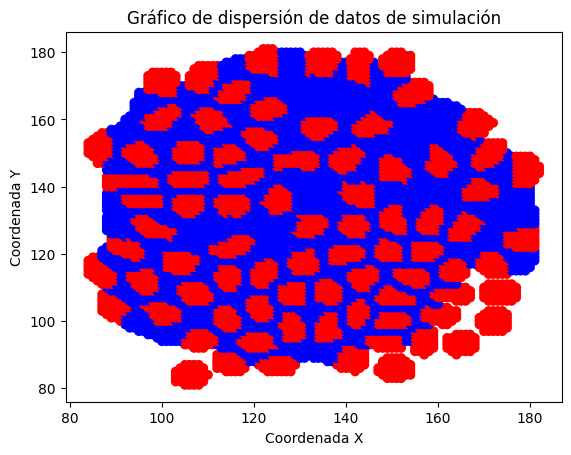

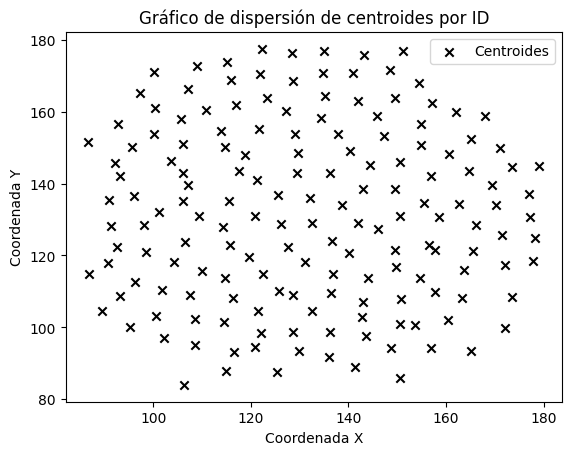

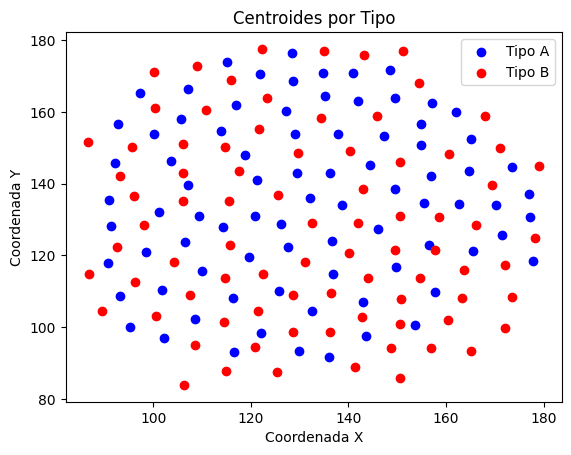

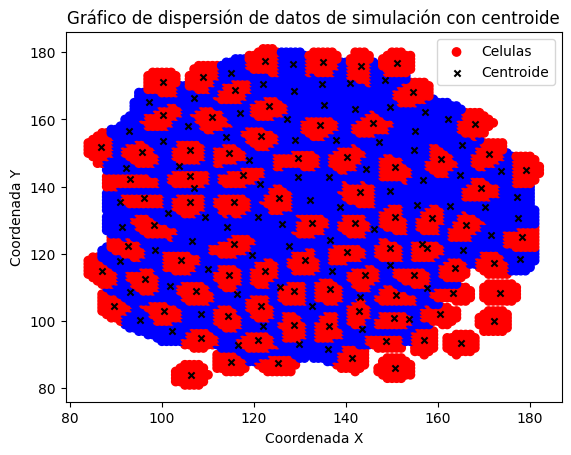

     centroides_x  centroides_y tipo
0      106.255814     83.953488    B
1      114.928571     87.952381    B
2      125.272727     87.477273    B
3      129.888889     93.266667    A
4      136.000000     91.630435    A
..            ...           ...  ...
159    122.363636    177.522727    B
160    128.391304    176.500000    A
161    134.909091    177.045455    B
162    143.170732    175.804878    B
163    151.146341    176.853659    B

[164 rows x 3 columns]
[ 9.55028084 19.34063206 25.40191963 ...  8.3542647  16.23838327
  8.04427072]
Máximo: 103.1775221485333, Mínimo: 1.7545502170464533, Promedio: 44.818909467516924


In [70]:
# Cargar datos desde un archivo CSV
url = "/home/jupyter-alumno15/celulas/csv/archivo_3.csv"
df = pd.read_csv(url, header=None)
df.head(5)

# Asignar nombres a las columnas
nombres_columnas = ['id', "Tipo", 'X', 'Y', "Z"]  # Reemplaza con los nombres que correspondan
df.columns = nombres_columnas

# Mostrar el DataFrame
print(df)

# Extraer las coordenadas X e Y y el tipo
X = df['X']
Y = df['Y']
tipo = df['Tipo']
id1 = df['id']

# Crear un mapa de colores basado en los tipos
colores = {'A': 'b', 'B': 'r'}  # Ajusta los colores a cada tipo
colores_puntos = [colores[t] for t in tipo]

# Crear y guardar el gráfico de dispersión inicial
plt.scatter(X, Y, c=colores_puntos)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Gráfico de dispersión de datos de simulación')
if not path.exists('Datos_im'):
    makedirs('Datos_im')
plt.savefig(f'Datos_im/grafico_dispersion_{path.basename(url)}.png')
plt.show()
plt.close()

# Agrupar los datos por el ID
grupos = df.groupby('id')

# Inicializar listas para almacenar los centroides
centroides_x = []
centroides_y = []

# Calcular el centroide para cada grupo
for id_grupo, grupo in grupos:
    X_grupo = grupo['X']
    Y_grupo = grupo['Y']
    centroid_x_grupo = X_grupo.mean()
    centroid_y_grupo = Y_grupo.mean()
    centroides_x.append(centroid_x_grupo)
    centroides_y.append(centroid_y_grupo)

# Crear y guardar el gráfico de dispersión solo con los centroides
plt.scatter(centroides_x, centroides_y, color='black', marker='x', label='Centroides')  # Agregar los centroides al gráfico
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Gráfico de dispersión de centroides por ID')
plt.legend()  # Mostrar la leyenda con la etiqueta de los centroides
plt.savefig(f'Datos_im/grafico_centroides_{path.basename(url)}.png')
plt.show()
plt.close()

# Agrupar los datos por el ID y el Tipo
grupos_tipo = df.groupby(['id', 'Tipo'])

# Inicializar listas para almacenar los centroides y tipos
centroides_x = []
centroides_y = []
tipos_centroides = []

# Calcular el centroide y el tipo para cada grupo
for (id_grupo, tipo_grupo), grupo in grupos_tipo:
    X_grupo = grupo['X']
    Y_grupo = grupo['Y']
    centroid_x_grupo = X_grupo.mean()
    centroid_y_grupo = Y_grupo.mean()
    centroides_x.append(centroid_x_grupo)
    centroides_y.append(centroid_y_grupo)
    tipos_centroides.append(tipo_grupo)  # Guardar el tipo del grupo

# Crear y guardar el gráfico de dispersión con centroides por tipo
for tipo in set(tipos_centroides):
    color = 'b' if tipo == 'A' else 'r'  # Rojo para tipo 'A', azul para tipo 'B'
    indices_tipo = [i for i, t in enumerate(tipos_centroides) if t == tipo]
    centroides_x_tipo = [centroides_x[i] for i in indices_tipo]
    centroides_y_tipo = [centroides_y[i] for i in indices_tipo]
    plt.scatter(centroides_x_tipo, centroides_y_tipo, color=color, label=f'Tipo {tipo}')

plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Centroides por Tipo')
plt.legend()
plt.savefig(f'Datos_im/grafico_centroides_tipo_{path.basename(url)}.png')
plt.show()
plt.close()

# Crear y guardar el gráfico de dispersión combinado
plt.scatter(X, Y, c=colores_puntos, label='Celulas')
plt.scatter(centroides_x, centroides_y, color='black', marker='x', s=20, label='Centroide')  # Agregar el centroide al gráfico
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Gráfico de dispersión de datos de simulación con centroide')
plt.legend() 
plt.savefig(f'Datos_im/grafico_dispersion_centroides_{path.basename(url)}.png')
plt.show()
plt.close()

# Crear DataFrame con los centroides y tipos
df_centroides = pd.DataFrame({"centroides_x": centroides_x, "centroides_y": centroides_y, "tipo": tipos_centroides})
print(df_centroides)

# Guardar el DataFrame de centroides en un archivo CSV
output_dir = 'centroides'
if not path.exists(output_dir):
    makedirs(output_dir)
input_filename = path.basename(url)
output_filename = f"{output_dir}/centroides_{input_filename}"
df_centroides.to_csv(output_filename, index=False)

# Matriz de distancias
matrix_distance = pdist(df_centroides[['centroides_x', 'centroides_y']], metric='euclidean')
print(matrix_distance)

# Estadísticas de la matriz de distancias
maximo = matrix_distance.max()
minimo = matrix_distance.min()
promedio = matrix_distance.mean()
print(f"Máximo: {maximo}, Mínimo: {minimo}, Promedio: {promedio}")


/opt/tljh/user/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


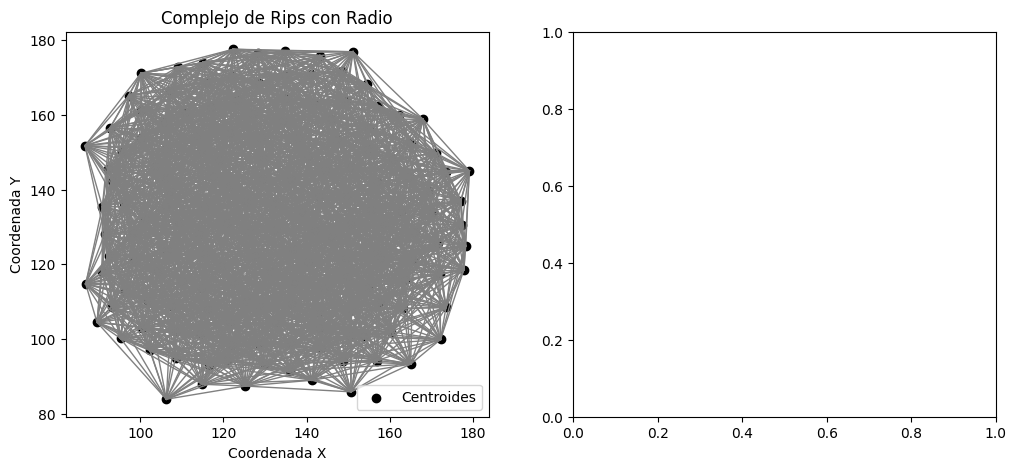

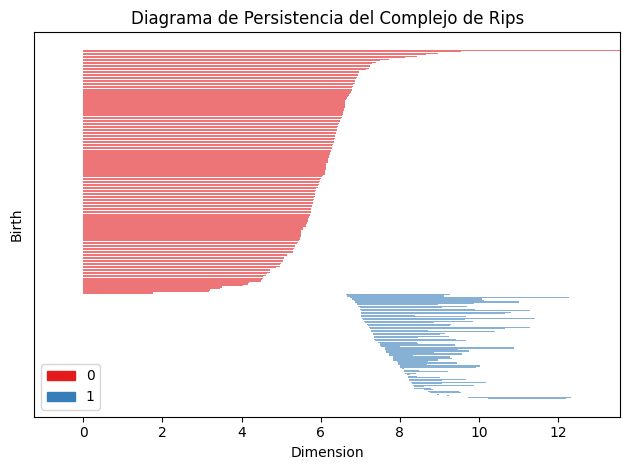

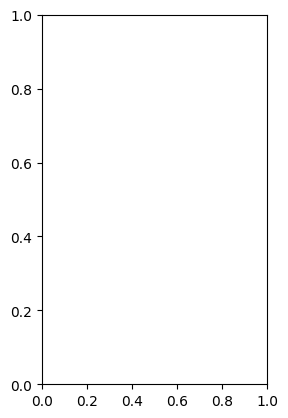

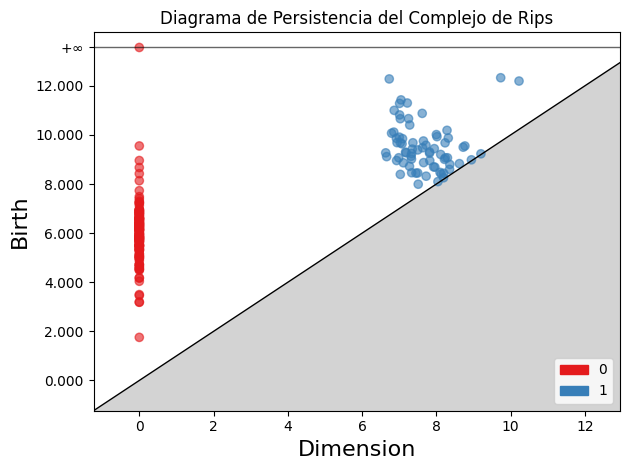

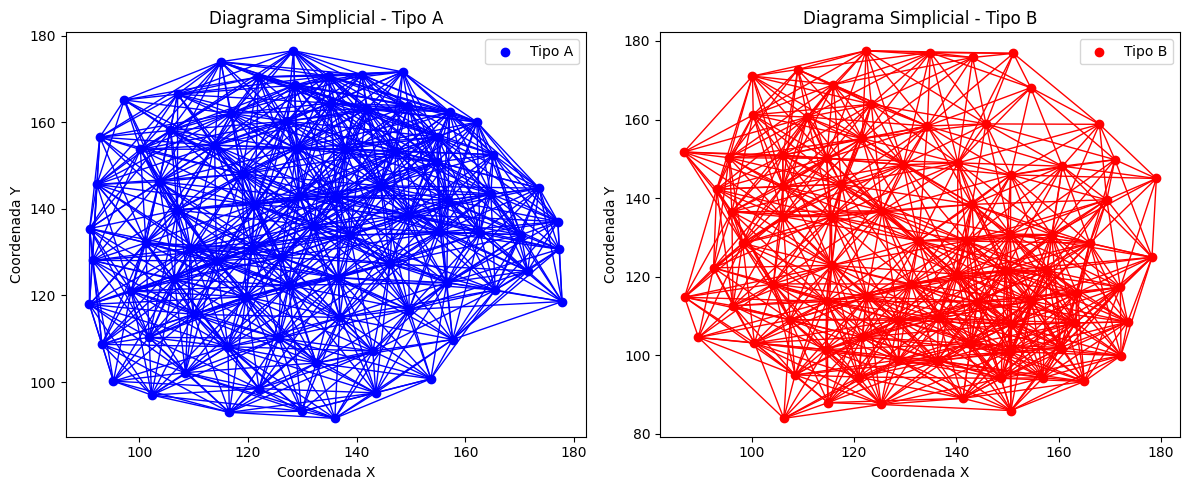

<Figure size 1200x500 with 0 Axes>

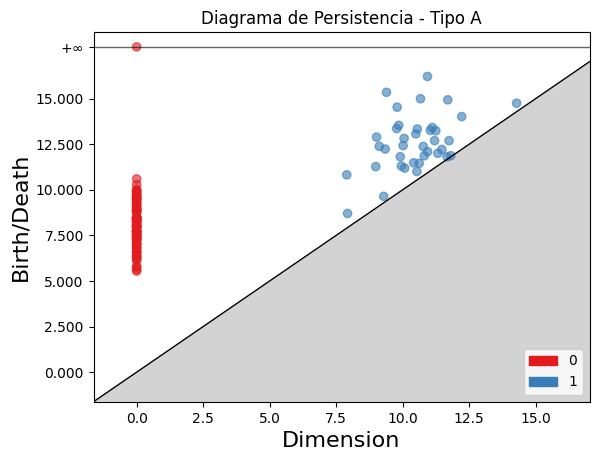

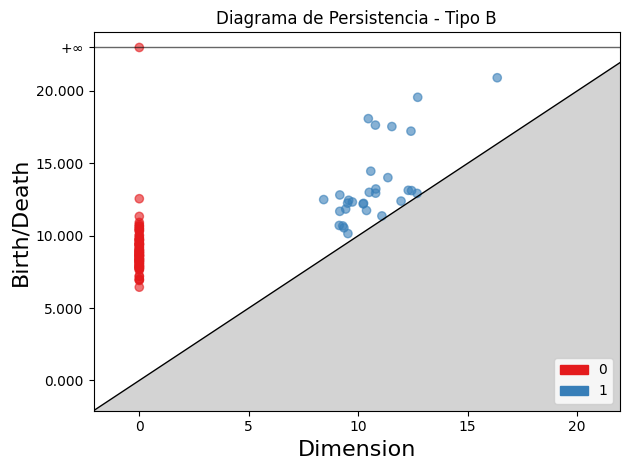

Diagrama de Persistencia - Tipo A (Dimensión 1): [[ 7.92532486  8.69869359]
 [ 9.28276326  9.63488356]
 [ 7.89568821 10.81405513]
 [10.53160097 10.99958292]
 [10.06974237 11.1845557 ]
 [ 8.98507261 11.26609954]
 [ 9.94738847 11.29908894]
 [10.61952728 11.45198569]
 [10.40999063 11.47587861]
 [11.66575348 11.80208562]
 [ 9.9070601  11.81030888]
 [10.80894541 11.86092584]
 [11.80383973 11.86646857]
 [11.31787068 11.99700877]
 [10.93491275 12.08585975]
 [11.47094289 12.20794054]
 [ 9.33917532 12.23121151]
 [10.7695503  12.37038638]
 [ 9.11569885 12.38075896]
 [10.01248452 12.41757547]
 [11.74003569 12.69007913]
 [11.19470822 12.69028429]
 [10.05034279 12.81411703]
 [ 9.01547898 12.88649536]
 [10.49140383 13.06105931]
 [11.24244235 13.23485311]
 [11.03634747 13.2590435 ]
 [10.54640452 13.32896892]
 [ 9.77058251 13.34993654]
 [11.10952965 13.40856114]
 [ 9.84754028 13.53124325]
 [12.21616499 14.00929953]
 [ 9.78899642 14.5252941 ]
 [14.27742092 14.74213222]
 [11.69067335 14.92747048]
 [10.6

In [71]:
# Convertir las coordenadas de los centroides a un formato adecuado para Gudhi
puntos = np.array(list(zip(centroides_x, centroides_y)))

# Calcular el complejo de Rips con un radio específico
rips_complex = gd.RipsComplex(points=puntos, max_edge_length=30)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

# Visualizar el complejo de Rips
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(centroides_x, centroides_y, color='black', label='Centroides')
for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
    if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
        arista = simplex[0]
        x = [centroides_x[i] for i in arista]
        y = [centroides_y[i] for i in arista]
        plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Complejo de Rips con Radio')
plt.legend()


# Calcular el diagrama de persistencia
diag = simplex_tree.persistence()

# Mostrar el diagrama de persistencia
plt.subplot(1, 2, 2)
gd.plot_persistence_barcode(diag)
plt.title('Diagrama de Persistencia del Complejo de Rips')
plt.xlabel('Dimension')
plt.ylabel('Birth')
plt.tight_layout()
plt.show()

plt.subplot(1, 2, 2)
gd.plot_persistence_diagram(diag)
plt.title('Diagrama de Persistencia del Complejo de Rips')
plt.xlabel('Dimension')
plt.ylabel('Birth')
plt.tight_layout()
plt.show()

# Separar los centroides por tipo
centroides_tipo_A = [(x, y) for x, y, tipo in zip(centroides_x, centroides_y, tipos_centroides) if tipo == 'A']
centroides_tipo_B = [(x, y) for x, y, tipo in zip(centroides_x, centroides_y, tipos_centroides) if tipo == 'B']

# Convertir las coordenadas de los centroides a un formato adecuado para Gudhi
puntos_tipo_A = np.array(centroides_tipo_A)
puntos_tipo_B = np.array(centroides_tipo_B)

# Calcular el complejo de Rips con un radio específico para cada tipo
rips_complex_tipo_A = gd.RipsComplex(points=puntos_tipo_A, max_edge_length=30)
rips_complex_tipo_B = gd.RipsComplex(points=puntos_tipo_B, max_edge_length=30)

# Generar un diagrama simplicial para cada tipo
simplex_tree_A = rips_complex_tipo_A.create_simplex_tree(max_dimension=3)
simplex_tree_B = rips_complex_tipo_B.create_simplex_tree(max_dimension=3)

# Visualizar los diagramas simpliciales para cada tipo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for simplex in simplex_tree_A.get_skeleton(1):
    if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
        arista = simplex[0]
        x = [puntos_tipo_A[i][0] for i in arista]
        y = [puntos_tipo_A[i][1] for i in arista]
        plt.plot(x, y, color='blue', linestyle='-', linewidth=1)  # Color azul para tipo A
plt.scatter(puntos_tipo_A[:, 0], puntos_tipo_A[:, 1], color='blue', label='Tipo A')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Diagrama Simplicial - Tipo A')
plt.legend()

plt.subplot(1, 2, 2)
for simplex in simplex_tree_B.get_skeleton(1):
    if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
        arista = simplex[0]
        x = [puntos_tipo_B[i][0] for i in arista]
        y = [puntos_tipo_B[i][1] for i in arista]
        plt.plot(x, y, color='red', linestyle='-', linewidth=1)  # Color rojo para tipo B
plt.scatter(puntos_tipo_B[:, 0], puntos_tipo_B[:, 1], color='red', label='Tipo B')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Diagrama Simplicial - Tipo B')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))


gd.plot_persistence_diagram(simplex_tree_A.persistence(), legend=True)
plt.title('Diagrama de Persistencia - Tipo A')
plt.xlabel('Dimension')
plt.ylabel('Birth/Death')

gd.plot_persistence_diagram(simplex_tree_B.persistence(), legend=True)
plt.title('Diagrama de Persistencia - Tipo B')
plt.xlabel('Dimension')
plt.ylabel('Birth/Death')

plt.tight_layout()
plt.show()

# Calcular los diagramas de persistencia para cada tipo
simplex_tree_A.compute_persistence()
simplex_tree_B.compute_persistence()

diag_persistencia_tipo_A = simplex_tree_A.persistence_intervals_in_dimension(1)
diag_persistencia_tipo_B = simplex_tree_B.persistence_intervals_in_dimension(1)
diag_persistencia_tipo_A_0 = simplex_tree_A.persistence_intervals_in_dimension(0)
diag_persistencia_tipo_B_0 = simplex_tree_B.persistence_intervals_in_dimension(0)

print("Diagrama de Persistencia - Tipo A (Dimensión 1):", diag_persistencia_tipo_A)
print("Diagrama de Persistencia - Tipo B (Dimensión 1):", diag_persistencia_tipo_B)

print("Diagrama de Persistencia - Tipo A (Dimensión 0):", diag_persistencia_tipo_A_0)
print("Diagrama de Persistencia - Tipo B (Dimensión .):", diag_persistencia_tipo_B_0)

# Calcular la distancia de Bottleneck entre los dos diagramas de persistencia
distancia_bottleneck = gd.bottleneck_distance(diag_persistencia_tipo_A, diag_persistencia_tipo_B)
print("Distancia de Bottleneck:", distancia_bottleneck)

# Calcular la distancia de Bottleneck entre los dos diagramas de persistencia
distancia_bottleneck_0 = gd.bottleneck_distance(diag_persistencia_tipo_A_0, diag_persistencia_tipo_B_0)
print("Distancia de Bottleneck:", distancia_bottleneck_0)